<a href="https://colab.research.google.com/github/Deepthi2006/kaggle-projects/blob/main/snowflake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install snowflake
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Found

In [2]:
import snowflake.connector
import pandas as pd


In [6]:

import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
user = "DEEPTHI",
password="",   # same password you use normally
account = "",
warehouse="COMPUTE_WH",
database = "SNOWFLAKE_LEARNING_DB",
schema="PUBLIC",
role="ACCOUNTADMIN"
)

print("Connected successfully!")

Connected successfully!


In [9]:
cur = conn.cursor()
cur.execute("SELECT CURRENT_VERSION()")
print(cur.fetchone())


('9.40.7',)


In [11]:
query = "SELECT * FROM IRIS"
df = pd.read_sql(query, conn)

df.head()


/tmp/ipython-input-2595736977.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ID,SEPALLENGTHCM,SEPALWIDTHCM,PETALLENGTHCM,PETALWIDTHCM,SPECIES
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [22]:
X = df.drop(['SPECIES', 'ID'], axis=1)
y = df['SPECIES']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [25]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [27]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # example flower
prediction = model.predict(sample)

print("Predicted class:", encoder.inverse_transform(prediction))


Predicted class: ['Iris-setosa']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


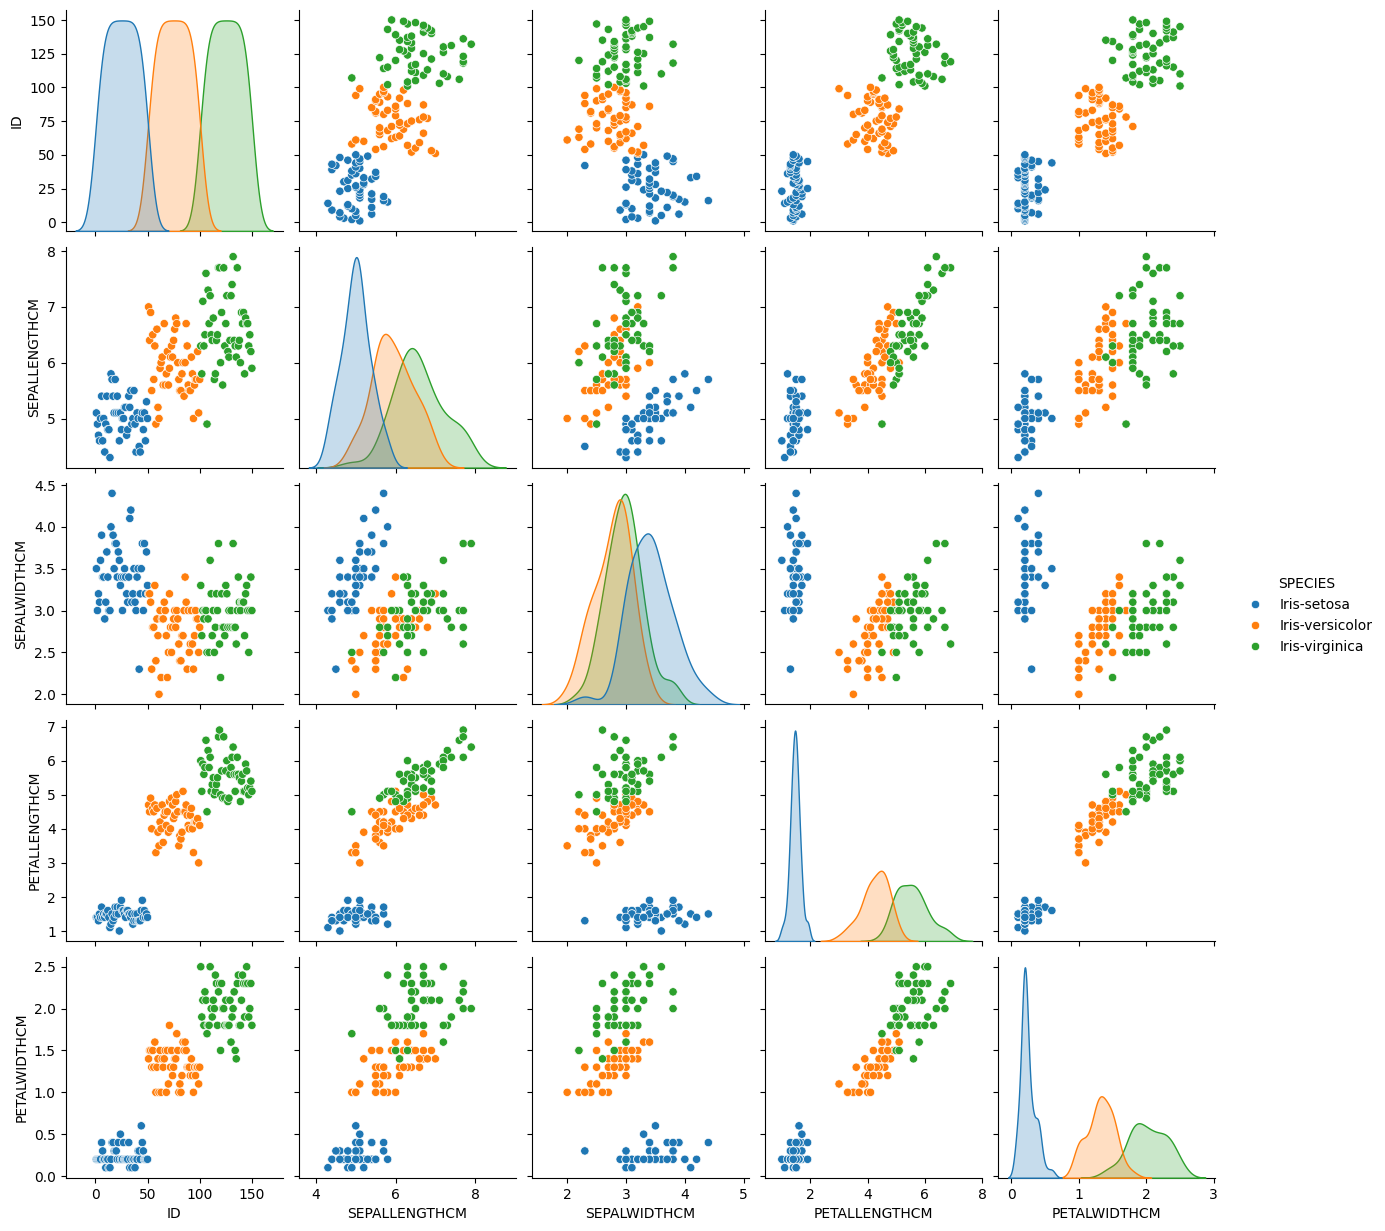

In [28]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='SPECIES')
plt.show()


In [30]:
#push to pickle
import pickle
pickle.dump(model, open('model.pkl', 'wb'))


In [31]:
#download pickle
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
cursor = conn.cursor()
cursor.execute("select * from iris;")
df = cursor.fetch_pandas_all()
print(df)
cursor.close()

      ID  SEPALLENGTHCM  SEPALWIDTHCM  PETALLENGTHCM  PETALWIDTHCM  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            SPECIES  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

True